## Validation of the SA and SST wall models
comparison with wall resolved simulations and measurements for the Buice and Eaton diffuser

In [1]:
#import matplotlib.
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon
import pandas as pd
import io
import matplotlib.image as mpimg


define the main directory with all the testcases

In [2]:
basedir="/home/nijso/Codes/su2cases/validation/buice_eaton_diffuser/"

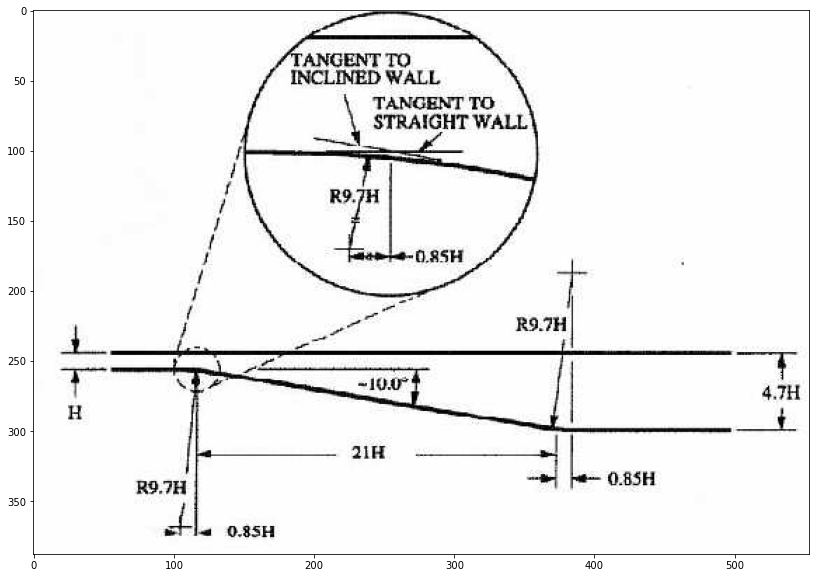

In [3]:
# show the geometry from the paper
data_image = mpimg.imread(basedir+'geometry_paper.jpg')
plt.figure(figsize=(20,10))
plt.imshow(data_image)
plt.show()

We first have a look at the skin friction at the upper and lower wall

In [4]:
# test with the skin friction coefficient of the top wall
data_upper_SST_coarse = pd.read_csv(basedir+"SST_coarse/cf_top0.csv")
data_lower_SST_coarse = pd.read_csv(basedir+"SST_coarse/cf_bottom0.csv")

data_upper_SST_fine = pd.read_csv(basedir+"SST_fine/cf_top0.csv")
data_lower_SST_fine = pd.read_csv(basedir+"SST_fine/cf_bottom0.csv")

data_upper_SA_coarse = pd.read_csv(basedir+"SA_coarse/cf_top0.csv")
data_lower_SA_coarse = pd.read_csv(basedir+"SA_coarse/cf_bottom0.csv")

data_upper_SA_fine = pd.read_csv(basedir+"SA_fine/cf_top0.csv")
data_lower_SA_fine = pd.read_csv(basedir+"SA_fine/cf_bottom0.csv")

data_upper_SST_coarse_wall = pd.read_csv(basedir+"SST_coarse_wall/cf_top0.csv")
data_lower_SST_coarse_wall = pd.read_csv(basedir+"SST_coarse_wall/cf_bottom0.csv")

#data_upper_SST_coarse_wall_new = pd.read_csv(basedir+"SST_coarse_wall/cf_top_new0.csv")
#data_lower_SST_coarse_wall_new = pd.read_csv(basedir+"SST_coarse_wall/cf_bottom_new0.csv")

data_upper_SA_coarse_wall = pd.read_csv(basedir+"SA_coarse_wall/cf_top0.csv")
data_lower_SA_coarse_wall = pd.read_csv(basedir+"SA_coarse_wall/cf_bottom0.csv")


In [5]:
# experimental data
cf10=pd.read_csv(basedir+"expdata/g_cf%.y10")
cf00=pd.read_csv(basedir+"expdata/g_cf%.y00")

In [6]:
# check the contents of the database
data_upper_SST_coarse.columns

Index(['Pressure', 'Velocity:0', 'Velocity:1', 'Velocity:2', 'Turb_Kin_Energy',
       'Omega', 'Pressure_Coefficient', 'Density', 'Laminar_Viscosity',
       'Skin_Friction_Coefficient:0', 'Skin_Friction_Coefficient:1',
       'Skin_Friction_Coefficient:2', 'Heat_Flux', 'Y_Plus', 'Eddy_Viscosity',
       'Residual_Pressure', 'Residual_Velocity:0', 'Residual_Velocity:1',
       'Residual_Velocity:2', 'Residual_TKE', 'Residual_Omega', 'Points:0',
       'Points:1', 'Points:2'],
      dtype='object')

In [7]:
cf_up_sst_coarse = np.sqrt(data_upper_SST_coarse['Skin_Friction_Coefficient:0']*data_upper_SST_coarse['Skin_Friction_Coefficient:0']+
                           data_upper_SST_coarse['Skin_Friction_Coefficient:1']*data_upper_SST_coarse['Skin_Friction_Coefficient:1']+
                           data_upper_SST_coarse['Skin_Friction_Coefficient:2']*data_upper_SST_coarse['Skin_Friction_Coefficient:2'])

cf_lo_sst_coarse = np.sqrt(data_lower_SST_coarse['Skin_Friction_Coefficient:0']*data_lower_SST_coarse['Skin_Friction_Coefficient:0']+
                           data_lower_SST_coarse['Skin_Friction_Coefficient:1']*data_lower_SST_coarse['Skin_Friction_Coefficient:1']+
                           data_lower_SST_coarse['Skin_Friction_Coefficient:2']*data_lower_SST_coarse['Skin_Friction_Coefficient:2'])


cf_up_sst_fine = np.sqrt(data_upper_SST_fine['Skin_Friction_Coefficient:0']*data_upper_SST_fine['Skin_Friction_Coefficient:0']+
                         data_upper_SST_fine['Skin_Friction_Coefficient:1']*data_upper_SST_fine['Skin_Friction_Coefficient:1']+
                         data_upper_SST_fine['Skin_Friction_Coefficient:2']*data_upper_SST_fine['Skin_Friction_Coefficient:2'])

cf_lo_sst_fine = np.sqrt(data_lower_SST_fine['Skin_Friction_Coefficient:0']*data_lower_SST_fine['Skin_Friction_Coefficient:0']+
                         data_lower_SST_fine['Skin_Friction_Coefficient:1']*data_lower_SST_fine['Skin_Friction_Coefficient:1']+
                         data_lower_SST_fine['Skin_Friction_Coefficient:2']*data_lower_SST_fine['Skin_Friction_Coefficient:2'])

In [8]:
plt.rcParams['lines.linewidth'] = 3

SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.minor.size'] = 8
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['xtick.minor.width'] = 1

plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.minor.size'] = 8
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['ytick.minor.width'] = 1


plt.rcParams['axes.linewidth'] = 2 # set the value globally

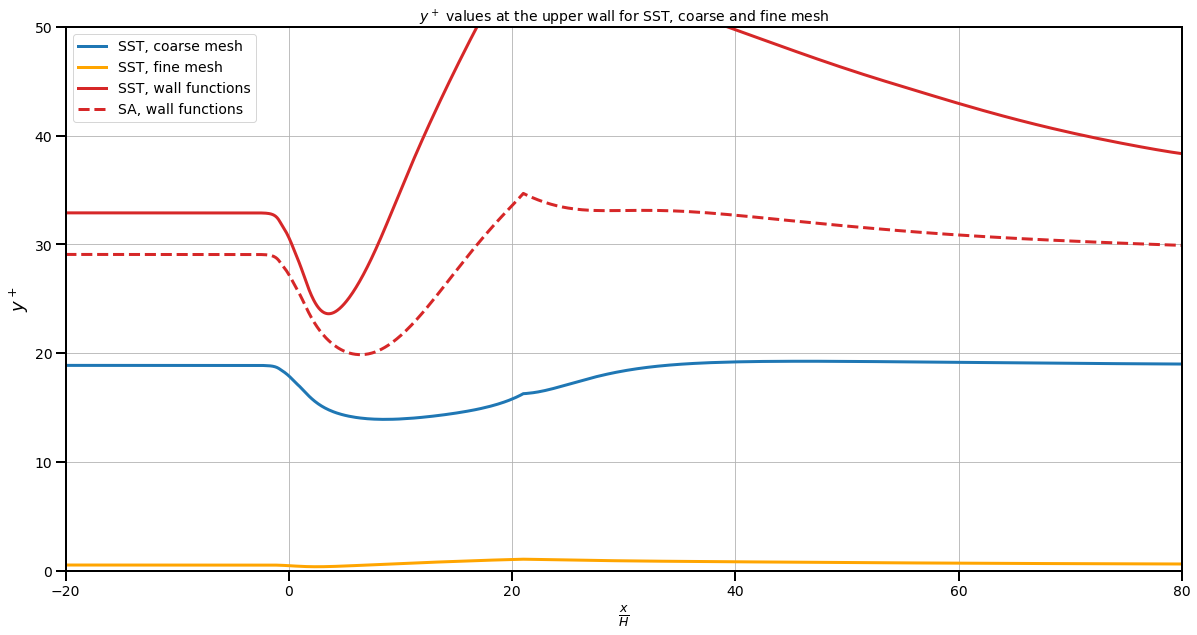

In [9]:
# plot y+
plt.figure(figsize=(20,10))
plt.grid(which='major')

# plot SU2 data

# data is not sorted by x
x, y = zip(*sorted(zip(data_upper_SST_coarse['Points:0']/0.015, data_upper_SST_coarse['Y_Plus'])) )

plt.plot(x,y,'tab:blue',linestyle='solid',label='SST, coarse mesh')

# data is not sorted by x
x, y = zip(*sorted(zip(data_upper_SST_fine['Points:0']/0.015, data_upper_SST_fine['Y_Plus'])) )

plt.plot(x,y,'orange',linestyle='solid',label='SST, fine mesh')


# data is not sorted by x
x, y = zip(*sorted(zip(data_upper_SST_coarse_wall['Points:0']/0.015, data_upper_SST_coarse_wall['Y_Plus'])) )

plt.plot(x,y,'tab:red',linestyle='solid',label='SST, wall functions')

# data is not sorted by x
x, y = zip(*sorted(zip(data_upper_SA_coarse_wall['Points:0']/0.015, data_upper_SA_coarse_wall['Y_Plus'])) )

plt.plot(x,y,'tab:red',linestyle='dashed',label='SA, wall functions')


plt.legend()
plt.xlabel('$\\frac{x}{H}$')
plt.ylabel('$y^+$')
plt.xlim(-20,80)
plt.ylim(0,50)
plt.title("$y^+$ values at the upper wall for SST, coarse and fine mesh")
plt.show()

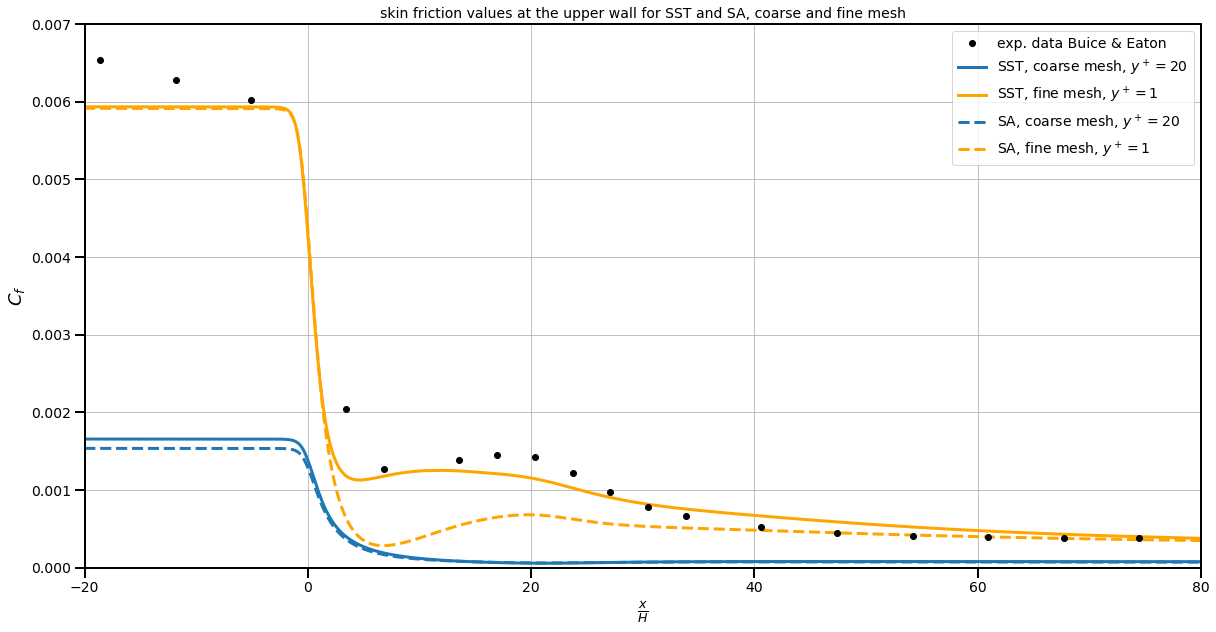

In [10]:
#plot Cf, upper wall
plt.figure(figsize=(20,10))
plt.grid(which='major')


# plot SU2 data

# plot experimental data (call last because plotting is back to front, first to last, in this way exp. data will always be on top of the lines)
# however, the order in the legend will also change. instead, we use zorder with a high value to place experimental data on top
plt.plot(cf10['x'],cf10['cf'],'o',color='black',label='exp. data Buice & Eaton', zorder = 10)


# ### SST ### #

# data is not sorted by x
x, y = zip(*sorted(zip(data_upper_SST_coarse['Points:0']/0.015,data_upper_SST_coarse['Skin_Friction_Coefficient:0'] )) )
plt.plot(x,y,color='tab:blue',label='SST, coarse mesh, $y^+=20$')

x, y = zip(*sorted(zip(data_upper_SST_fine['Points:0']/0.015,data_upper_SST_fine['Skin_Friction_Coefficient:0'] )) )
plt.plot(x,y,color='orange',label='SST, fine mesh, $y^+=1$')

# ### SA ### #

# data is not sorted by x
x, y = zip(*sorted(zip(data_upper_SA_coarse['Points:0']/0.015,data_upper_SA_coarse['Skin_Friction_Coefficient:0'] )) )
plt.plot(x,y,color='tab:blue',linestyle='dashed',label='SA, coarse mesh, $y^+=20$')

x, y = zip(*sorted(zip(data_upper_SA_fine['Points:0']/0.015,data_upper_SA_fine['Skin_Friction_Coefficient:0'] )) )
plt.plot(x,y,color='orange',linestyle='dashed',label='SA, fine mesh, $y^+=1$')

# ### SST WALL FUNCTIONS ### #

# data is not sorted by x
#x, y = zip(*sorted(zip(data_upper_SST_coarse_wall['Points:0']/0.015,-data_upper_SST_coarse_wall['Skin_Friction_Coefficient:0'] )) )
#plt.plot(x,y,color='tab:red',linestyle='dashed',label='SST, coarse mesh, wall functions')

# ### SA WALL FUNCTIONS ### #

#x, y = zip(*sorted(zip(data_upper_SA_coarse_wall['Points:0']/0.015,-data_upper_SA_coarse_wall['Skin_Friction_Coefficient:0'] )) )
#plt.plot(x,y,color='red',linestyle='dashed',label='SA, coarse mesh, wall functions')




plt.legend()
plt.title("skin friction values at the upper wall for SST and SA, coarse and fine mesh")
plt.xlabel('$\\frac{x}{H}$')
plt.ylabel('$C_f$')
plt.xlim(-20,80)
plt.ylim(0,0.007)
plt.show()

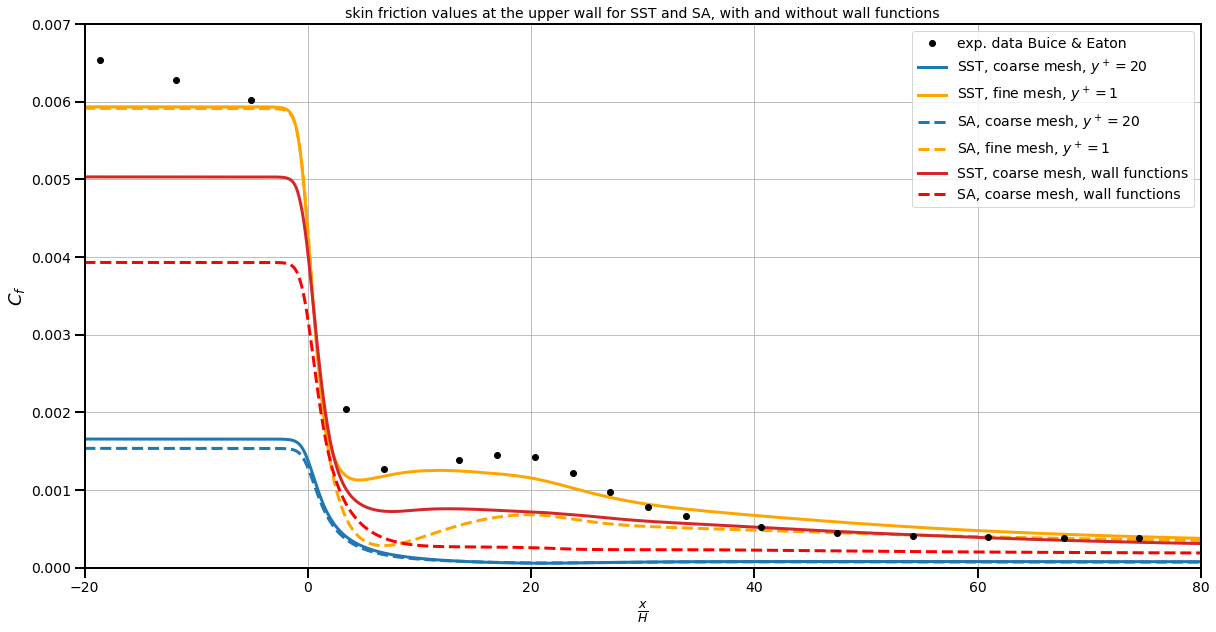

In [11]:
#plot Cf, upper wall
plt.figure(figsize=(20,10))
plt.grid(which='major')


# plot SU2 data

# plot experimental data (call last because plotting is back to front, first to last, in this way exp. data will always be on top of the lines)
# however, the order in the legend will also change. instead, we use zorder with a high value to place experimental data on top
plt.plot(cf10['x'],cf10['cf'],'o',color='black',label='exp. data Buice & Eaton', zorder = 10)


# ### SST ### #

# data is not sorted by x
x, y = zip(*sorted(zip(data_upper_SST_coarse['Points:0']/0.015,data_upper_SST_coarse['Skin_Friction_Coefficient:0'] )) )
plt.plot(x,y,color='tab:blue',label='SST, coarse mesh, $y^+=20$')

x, y = zip(*sorted(zip(data_upper_SST_fine['Points:0']/0.015,data_upper_SST_fine['Skin_Friction_Coefficient:0'] )) )
plt.plot(x,y,color='orange',label='SST, fine mesh, $y^+=1$')

# ### SA ### #

# data is not sorted by x
x, y = zip(*sorted(zip(data_upper_SA_coarse['Points:0']/0.015,data_upper_SA_coarse['Skin_Friction_Coefficient:0'] )) )
plt.plot(x,y,color='tab:blue',linestyle='dashed',label='SA, coarse mesh, $y^+=20$')

x, y = zip(*sorted(zip(data_upper_SA_fine['Points:0']/0.015,data_upper_SA_fine['Skin_Friction_Coefficient:0'] )) )
plt.plot(x,y,color='orange',linestyle='dashed',label='SA, fine mesh, $y^+=1$')

# ### SST WALL FUNCTIONS ### #

# data is not sorted by x
x, y = zip(*sorted(zip(data_upper_SST_coarse_wall['Points:0']/0.015,-data_upper_SST_coarse_wall['Skin_Friction_Coefficient:0'] )) )
plt.plot(x,y,color='tab:red',linestyle='solid',label='SST, coarse mesh, wall functions')

# ### SA WALL FUNCTIONS ### #

x, y = zip(*sorted(zip(data_upper_SA_coarse_wall['Points:0']/0.015,-data_upper_SA_coarse_wall['Skin_Friction_Coefficient:0'] )) )
plt.plot(x,y,color='red',linestyle='dashed',label='SA, coarse mesh, wall functions')

# data is not sorted by x
#x, y = zip(*sorted(zip(data_upper_SST_coarse_wall_new['Points:0']/0.015,-data_upper_SST_coarse_wall_new['Skin_Friction_Coefficient:0'] )) )
#plt.plot(x,y,color='black',linestyle='solid',label='SST, coarse mesh, wall functions')



plt.legend()
plt.title("skin friction values at the upper wall for SST and SA, with and without wall functions")
plt.xlabel('$\\frac{x}{H}$')
plt.ylabel('$C_f$')
plt.xlim(-20,80)
plt.ylim(0,0.007)
plt.savefig('Cf_upperwall.png')
plt.show()

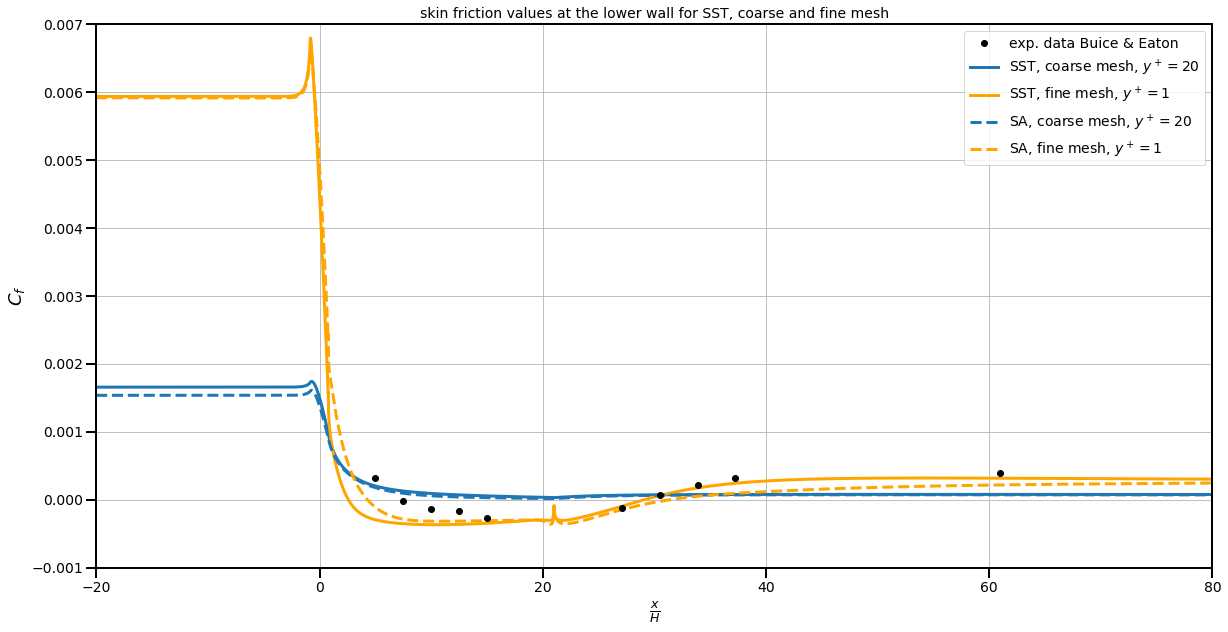

In [12]:
# plot Cf, lower wall

plt.figure(figsize=(20,10))
plt.grid(which='major')

# plot experimental data

plt.plot(cf00['x'],cf00['cf'],'o',color='black',label='exp. data Buice & Eaton',zorder=10)

# plot SU2 data
x, y = zip(*sorted(zip(data_lower_SST_coarse['Points:0']/0.015,data_lower_SST_coarse['Skin_Friction_Coefficient:0'] )) )
plt.plot(x,y,color='tab:blue',label='SST, coarse mesh, $y^+=20$')

x, y = zip(*sorted(zip(data_lower_SST_fine['Points:0']/0.015,data_lower_SST_fine['Skin_Friction_Coefficient:0'] )) )
plt.plot(x,y,color='orange',label='SST, fine mesh, $y^+=1$')

x, y = zip(*sorted(zip(data_lower_SA_coarse['Points:0']/0.015,data_lower_SA_coarse['Skin_Friction_Coefficient:0'] )) )
plt.plot(x,y,color='tab:blue',linestyle='dashed',label='SA, coarse mesh, $y^+=20$')

x, y = zip(*sorted(zip(data_lower_SA_fine['Points:0']/0.015,data_lower_SA_fine['Skin_Friction_Coefficient:0'] )) )
plt.plot(x,y,color='orange',linestyle='dashed',label='SA, fine mesh, $y^+=1$')


plt.legend()
plt.title("skin friction values at the lower wall for SST, coarse and fine mesh")
plt.xlabel('$\\frac{x}{H}$')
plt.ylabel('$C_f$')
plt.xlim(-20,80)
plt.ylim(-0.001,0.007)
plt.show()

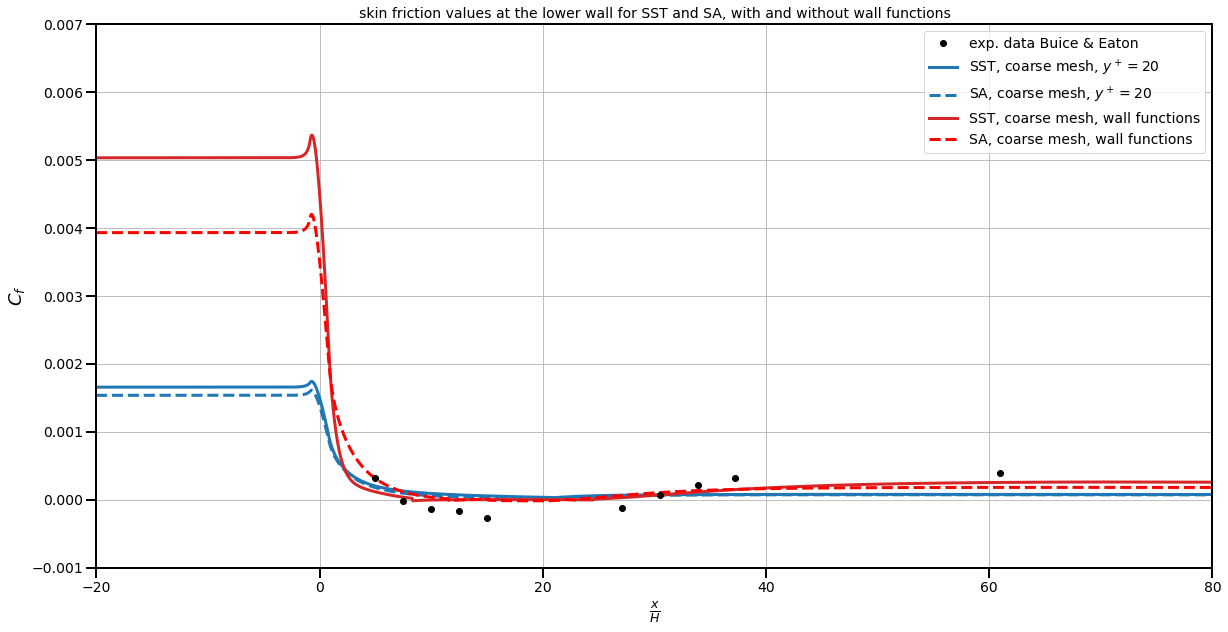

In [13]:
#plot Cf, lower wall
plt.figure(figsize=(20,10))
plt.grid(which='major')


# plot SU2 data

# plot experimental data (call last because plotting is back to front, first to last, in this way exp. data will always be on top of the lines)
# however, the order in the legend will also change. instead, we use zorder with a high value to place experimental data on top
plt.plot(cf00['x'],cf00['cf'],'o',color='black',label='exp. data Buice & Eaton', zorder = 10)


# ### SST ### #

# data is not sorted by x
x, y = zip(*sorted(zip(data_lower_SST_coarse['Points:0']/0.015,data_lower_SST_coarse['Skin_Friction_Coefficient:0'] )) )
plt.plot(x,y,color='tab:blue',label='SST, coarse mesh, $y^+=20$')

#x, y = zip(*sorted(zip(data_upper_SST_fine['Points:0']/0.015,data_upper_SST_fine['Skin_Friction_Coefficient:0'] )) )
#plt.plot(x,y,color='orange',label='SST, fine mesh, $y^+=1$')

# ### SA ### #

# data is not sorted by x
x, y = zip(*sorted(zip(data_lower_SA_coarse['Points:0']/0.015,data_lower_SA_coarse['Skin_Friction_Coefficient:0'] )) )
plt.plot(x,y,color='tab:blue',linestyle='dashed',label='SA, coarse mesh, $y^+=20$')

#x, y = zip(*sorted(zip(data_upper_SA_fine['Points:0']/0.015,data_upper_SA_fine['Skin_Friction_Coefficient:0'] )) )
#plt.plot(x,y,color='orange',linestyle='dashed',label='SA, fine mesh, $y^+=1$')

# ### SST WALL FUNCTIONS ### #

# data is not sorted by x
x, y = zip(*sorted(zip(data_lower_SST_coarse_wall['Points:0']/0.015,-data_lower_SST_coarse_wall['Skin_Friction_Coefficient:0'] )) )
plt.plot(x,y,color='tab:red',linestyle='solid',label='SST, coarse mesh, wall functions')

# ### SA WALL FUNCTIONS ### #

x, y = zip(*sorted(zip(data_lower_SA_coarse_wall['Points:0']/0.015,-data_lower_SA_coarse_wall['Skin_Friction_Coefficient:0'] )) )
plt.plot(x,y,color='red',linestyle='dashed',label='SA, coarse mesh, wall functions')




plt.legend()
plt.title("skin friction values at the lower wall for SST and SA, with and without wall functions")
plt.xlabel('$\\frac{x}{H}$')
plt.ylabel('$C_f$')
plt.xlim(-20,80)
plt.ylim(-0.001,0.007)
plt.show()

In [14]:
# We can globally change the figure size 
plt.rcParams['figure.figsize'] = [20,10]
plt.rcParams['lines.linewidth']=3
plt.rcParams['font.size']="16"

# ### read experimental data ### #

# we have a number of spaces as delimiter, not just one space, so we need regexp to deal with it.
dfmin6 = pd.read_csv("/home/nijso/Codes/su2cases/validation/buice_eaton_diffuser/expdata/m__U%.x-6",delimiter=r"\s+")
df03 = pd.read_csv("/home/nijso/Codes/su2cases/validation/buice_eaton_diffuser/expdata/m__U%.x03",delimiter=r"\s+")
df06 = pd.read_csv("/home/nijso/Codes/su2cases/validation/buice_eaton_diffuser/expdata/m__U%.x06",delimiter=r"\s+")
df14 = pd.read_csv("/home/nijso/Codes/su2cases/validation/buice_eaton_diffuser/expdata/m__U%.x14",delimiter=r"\s+")
df20 = pd.read_csv("/home/nijso/Codes/su2cases/validation/buice_eaton_diffuser/expdata/m__U%.x20",delimiter=r"\s+")
df30 = pd.read_csv("/home/nijso/Codes/su2cases/validation/buice_eaton_diffuser/expdata/m__U%.x30",delimiter=r"\s+")
df40 = pd.read_csv("/home/nijso/Codes/su2cases/validation/buice_eaton_diffuser/expdata/m__U%.x40",delimiter=r"\s+")
df47 = pd.read_csv("/home/nijso/Codes/su2cases/validation/buice_eaton_diffuser/expdata/m__U%.x47",delimiter=r"\s+")
df60 = pd.read_csv("/home/nijso/Codes/su2cases/validation/buice_eaton_diffuser/expdata/m__U%.x60",delimiter=r"\s+")
df74 = pd.read_csv("/home/nijso/Codes/su2cases/validation/buice_eaton_diffuser/expdata/m__U%.x74",delimiter=r"\s+")

# ### read SA coarse data ### #

SAmin6 = pd.read_csv(basedir+"SA_coarse/line_-6.00.csv")
SA03 = pd.read_csv(basedir+"SA_coarse/line_3.00.csv")
SA06 = pd.read_csv(basedir+"SA_coarse/line_6.00.csv")
SA14 = pd.read_csv(basedir+"SA_coarse/line_14.00.csv")
SA20 = pd.read_csv(basedir+"SA_coarse/line_20.00.csv")
SA30 = pd.read_csv(basedir+"SA_coarse/line_30.00.csv")
SA40 = pd.read_csv(basedir+"SA_coarse/line_40.00.csv")
SA47 = pd.read_csv(basedir+"SA_coarse/line_47.00.csv")
SA60 = pd.read_csv(basedir+"SA_coarse/line_60.00.csv")
SA74 = pd.read_csv(basedir+"SA_coarse/line_74.00.csv")

# ### read SST coarse data ### #

SSTmin6 = pd.read_csv(basedir+"SST_coarse/line_-6.00.csv")
SST03 = pd.read_csv(basedir+"SST_coarse/line_3.00.csv")
SST06 = pd.read_csv(basedir+"SST_coarse/line_6.00.csv")
SST14 = pd.read_csv(basedir+"SST_coarse/line_14.00.csv")
SST20 = pd.read_csv(basedir+"SST_coarse/line_20.00.csv")
SST30 = pd.read_csv(basedir+"SST_coarse/line_30.00.csv")
SST40 = pd.read_csv(basedir+"SST_coarse/line_40.00.csv")
SST47 = pd.read_csv(basedir+"SST_coarse/line_47.00.csv")
SST60 = pd.read_csv(basedir+"SST_coarse/line_60.00.csv")
SST74 = pd.read_csv(basedir+"SST_coarse/line_74.00.csv")

# ### read SA fine data ### #

SAfinemin6 = pd.read_csv(basedir+"SA_fine/line_-6.00.csv")
SAfine03 = pd.read_csv(basedir+"SA_fine/line_3.00.csv")
SAfine06 = pd.read_csv(basedir+"SA_fine/line_6.00.csv")
SAfine14 = pd.read_csv(basedir+"SA_fine/line_14.00.csv")
SAfine20 = pd.read_csv(basedir+"SA_fine/line_20.00.csv")
SAfine30 = pd.read_csv(basedir+"SA_fine/line_30.00.csv")
SAfine40 = pd.read_csv(basedir+"SA_fine/line_40.00.csv")
SAfine47 = pd.read_csv(basedir+"SA_fine/line_47.00.csv")
SAfine60 = pd.read_csv(basedir+"SA_fine/line_60.00.csv")
SAfine74 = pd.read_csv(basedir+"SA_fine/line_74.00.csv")

# ### read SST fine data ### #

SSTfinemin6 = pd.read_csv(basedir+"SST_fine/line_-6.00.csv")
SSTfine03 = pd.read_csv(basedir+"SST_fine/line_3.00.csv")
SSTfine06 = pd.read_csv(basedir+"SST_fine/line_6.00.csv")
SSTfine14 = pd.read_csv(basedir+"SST_fine/line_14.00.csv")
SSTfine20 = pd.read_csv(basedir+"SST_fine/line_20.00.csv")
SSTfine30 = pd.read_csv(basedir+"SST_fine/line_30.00.csv")
SSTfine40 = pd.read_csv(basedir+"SST_fine/line_40.00.csv")
SSTfine47 = pd.read_csv(basedir+"SST_fine/line_47.00.csv")
SSTfine60 = pd.read_csv(basedir+"SST_fine/line_60.00.csv")
SSTfine74 = pd.read_csv(basedir+"SST_fine/line_74.00.csv")

# ### read SA coarse WALL FUNCTIONS data ### #

SAcoarsewallmin6 = pd.read_csv(basedir+"SA_coarse_wall/line_-6.00.csv")
SAcoarsewall03 = pd.read_csv(basedir+"SA_coarse_wall/line_3.00.csv")
SAcoarsewall06 = pd.read_csv(basedir+"SA_coarse_wall/line_6.00.csv")
SAcoarsewall14 = pd.read_csv(basedir+"SA_coarse_wall/line_14.00.csv")
SAcoarsewall20 = pd.read_csv(basedir+"SA_coarse_wall/line_20.00.csv")
SAcoarsewall30 = pd.read_csv(basedir+"SA_coarse_wall/line_30.00.csv")
SAcoarsewall40 = pd.read_csv(basedir+"SA_coarse_wall/line_40.00.csv")
SAcoarsewall47 = pd.read_csv(basedir+"SA_coarse_wall/line_47.00.csv")
SAcoarsewall60 = pd.read_csv(basedir+"SA_coarse_wall/line_60.00.csv")
SAcoarsewall74 = pd.read_csv(basedir+"SA_coarse_wall/line_74.00.csv")

# ### read SST coarse WALL FUNCTIONS data ### #

SSTcoarsewallmin6 = pd.read_csv(basedir+"SST_coarse_wall/line_-6.00.csv")
SSTcoarsewall03 = pd.read_csv(basedir+"SST_coarse_wall/line_3.00.csv")
SSTcoarsewall06 = pd.read_csv(basedir+"SST_coarse_wall/line_6.00.csv")
SSTcoarsewall14 = pd.read_csv(basedir+"SST_coarse_wall/line_14.00.csv")
SSTcoarsewall20 = pd.read_csv(basedir+"SST_coarse_wall/line_20.00.csv")
SSTcoarsewall30 = pd.read_csv(basedir+"SST_coarse_wall/line_30.00.csv")
SSTcoarsewall40 = pd.read_csv(basedir+"SST_coarse_wall/line_40.00.csv")
SSTcoarsewall47 = pd.read_csv(basedir+"SST_coarse_wall/line_47.00.csv")
SSTcoarsewall60 = pd.read_csv(basedir+"SST_coarse_wall/line_60.00.csv")
SSTcoarsewall74 = pd.read_csv(basedir+"SST_coarse_wall/line_74.00.csv")


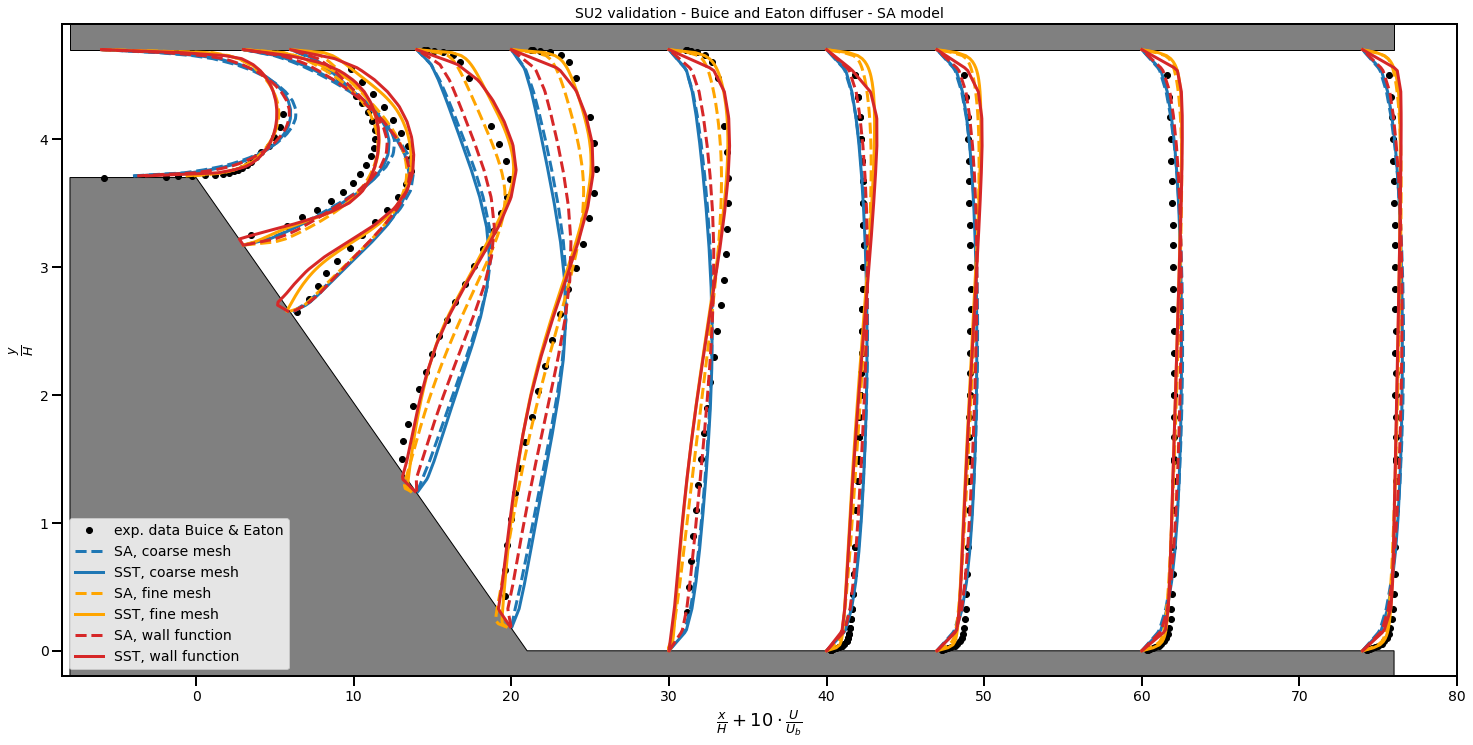

<Figure size 1440x720 with 0 Axes>

In [16]:
# walls
pts_top = np.array([[-8.0,4.7], [76,4.7], [76,5.7],[-8,5.7]])
pts_bottom = np.array([[-8.0,3.7], [0,3.7], [21,0],[76,0],[76,-5],[-8.0,-5]])

p1 = Polygon(pts_top, closed=True,fc='grey',ec='black')
p2 = Polygon(pts_bottom, closed=True,fc='grey',ec='black')

#fig = plt.figure()
fig, ax = plt.subplots(1,1,figsize=(25,12))
#ax.invert_yaxis()

H = 0.015

#ax.ylim(0,50)
#ax.plot(U, H, 'go--')

Uc = 10
Ub = 20

# ### experimental data ### #

ax.plot(-5.87+dfmin6['velocity']*Uc,dfmin6['location'],'o',color='black',label='exp. data Buice & Eaton')
ax.plot(2.59+df03['velocity']*Uc,df03['location'],'o',c='black')
ax.plot(5.98+df06['velocity']*Uc,df06['location'],'o',c='black')
ax.plot(13.56+df14['velocity']*Uc,df14['location'],'o',c='black')
ax.plot(20.32+df20['velocity']*Uc,df20['location'],'o',c='black')
ax.plot(30.48+df30['velocity']*Uc,df30['location'],'o',c='black')
ax.plot(40+df40['velocity']*Uc,df40['location'],'o',c='black')
ax.plot(40+df40['velocity']*Uc,df40['location'],'o',c='black')
ax.plot(47+df47['velocity']*Uc,df47['location'],'o',c='black')
ax.plot(60+df60['velocity']*Uc,df60['location'],'o',c='black')
ax.plot(74+df74['velocity']*Uc,df74['location'],'o',c='black')

# ### SA coarse ### #

ax.plot(-6 + SAmin6['Velocity:0']*Uc/Ub, SAmin6['Points:1']/H,'--',c='tab:blue',label='SA, coarse mesh')
ax.plot( 3 + SA03['Velocity:0']*Uc/Ub, SA03['Points:1']/H,'--',c='tab:blue')
ax.plot( 6 + SA06['Velocity:0']*Uc/Ub, SA06['Points:1']/H,'--',c='tab:blue')
ax.plot(14 + SA14['Velocity:0']*Uc/Ub, SA14['Points:1']/H,'--',c='tab:blue')
ax.plot(20 + SA20['Velocity:0']*Uc/Ub, SA20['Points:1']/H,'--',c='tab:blue')
ax.plot(30 + SA30['Velocity:0']*Uc/Ub, SA30['Points:1']/H,'--',c='tab:blue')
ax.plot(40 + SA40['Velocity:0']*Uc/Ub, SA40['Points:1']/H,'--',c='tab:blue')
ax.plot(47 + SA47['Velocity:0']*Uc/Ub, SA47['Points:1']/H,'--',c='tab:blue')
ax.plot(60 + SA60['Velocity:0']*Uc/Ub, SA60['Points:1']/H,'--',c='tab:blue')
ax.plot(74 + SA74['Velocity:0']*Uc/Ub, SA74['Points:1']/H,'--',c='tab:blue')

# ### SST coarse ### #

ax.plot(-6 + SSTmin6['Velocity:0']*Uc/Ub, SSTmin6['Points:1']/H,c='tab:blue',label='SST, coarse mesh')
ax.plot( 3 + SST03['Velocity:0']*Uc/Ub, SST03['Points:1']/H,c='tab:blue')
ax.plot( 6 + SST06['Velocity:0']*Uc/Ub, SST06['Points:1']/H,c='tab:blue')
ax.plot(14 + SST14['Velocity:0']*Uc/Ub, SST14['Points:1']/H,c='tab:blue')
ax.plot(20 + SST20['Velocity:0']*Uc/Ub, SST20['Points:1']/H,c='tab:blue')
ax.plot(30 + SST30['Velocity:0']*Uc/Ub, SST30['Points:1']/H,c='tab:blue')
ax.plot(40 + SST40['Velocity:0']*Uc/Ub, SST40['Points:1']/H,c='tab:blue')
ax.plot(47 + SST47['Velocity:0']*Uc/Ub, SST47['Points:1']/H,c='tab:blue')
ax.plot(60 + SST60['Velocity:0']*Uc/Ub, SST60['Points:1']/H,c='tab:blue')
ax.plot(74 + SST74['Velocity:0']*Uc/Ub, SST74['Points:1']/H,c='tab:blue')

# ### SA fine ### #

ax.plot(-6 + SAfinemin6['Velocity:0']*Uc/Ub, SAfinemin6['Points:1']/H,'--',c='orange',label='SA, fine mesh')
ax.plot( 3 + SAfine03['Velocity:0']*Uc/Ub, SAfine03['Points:1']/H,'--',c='orange')
ax.plot( 6 + SAfine06['Velocity:0']*Uc/Ub, SAfine06['Points:1']/H,'--',c='orange')
ax.plot(14 + SAfine14['Velocity:0']*Uc/Ub, SAfine14['Points:1']/H,'--',c='orange')
ax.plot(20 + SAfine20['Velocity:0']*Uc/Ub, SAfine20['Points:1']/H,'--',c='orange')
ax.plot(30 + SAfine30['Velocity:0']*Uc/Ub, SAfine30['Points:1']/H,'--',c='orange')
ax.plot(40 + SAfine40['Velocity:0']*Uc/Ub, SAfine40['Points:1']/H,'--',c='orange')
ax.plot(47 + SAfine47['Velocity:0']*Uc/Ub, SAfine47['Points:1']/H,'--',c='orange')
ax.plot(60 + SAfine60['Velocity:0']*Uc/Ub, SAfine60['Points:1']/H,'--',c='orange')
ax.plot(74 + SAfine74['Velocity:0']*Uc/Ub, SAfine74['Points:1']/H,'--',c='orange')

# ### SST fine ### #

ax.plot(-6 + SSTfinemin6['Velocity:0']*Uc/Ub, SSTfinemin6['Points:1']/H,c='orange',label='SST, fine mesh')
ax.plot( 3 + SSTfine03['Velocity:0']*Uc/Ub, SSTfine03['Points:1']/H,c='orange')
ax.plot( 6 + SSTfine06['Velocity:0']*Uc/Ub, SSTfine06['Points:1']/H,c='orange')
ax.plot(14 + SSTfine14['Velocity:0']*Uc/Ub, SSTfine14['Points:1']/H,c='orange')
ax.plot(20 + SSTfine20['Velocity:0']*Uc/Ub, SSTfine20['Points:1']/H,c='orange')
ax.plot(30 + SSTfine30['Velocity:0']*Uc/Ub, SSTfine30['Points:1']/H,c='orange')
ax.plot(40 + SSTfine40['Velocity:0']*Uc/Ub, SSTfine40['Points:1']/H,c='orange')
ax.plot(47 + SSTfine47['Velocity:0']*Uc/Ub, SSTfine47['Points:1']/H,c='orange')
ax.plot(60 + SSTfine60['Velocity:0']*Uc/Ub, SSTfine60['Points:1']/H,c='orange')
ax.plot(74 + SSTfine74['Velocity:0']*Uc/Ub, SSTfine74['Points:1']/H,c='orange')

# ### SA coarse, wall functions ### #

ax.plot(-6 + SAcoarsewallmin6['Velocity:0']*Uc/Ub, SAcoarsewallmin6['Points:1']/H,'--',c='tab:red',label='SA, wall function')
ax.plot( 3 + SAcoarsewall03['Velocity:0']*Uc/Ub, SAcoarsewall03['Points:1']/H,'--',c='tab:red')
ax.plot( 6 + SAcoarsewall06['Velocity:0']*Uc/Ub, SAcoarsewall06['Points:1']/H,'--',c='tab:red')
ax.plot(14 + SAcoarsewall14['Velocity:0']*Uc/Ub, SAcoarsewall14['Points:1']/H,'--',c='tab:red')
ax.plot(20 + SAcoarsewall20['Velocity:0']*Uc/Ub, SAcoarsewall20['Points:1']/H,'--',c='tab:red')
ax.plot(30 + SAcoarsewall30['Velocity:0']*Uc/Ub, SAcoarsewall30['Points:1']/H,'--',c='tab:red')
ax.plot(40 + SAcoarsewall40['Velocity:0']*Uc/Ub, SAcoarsewall40['Points:1']/H,'--',c='tab:red')
ax.plot(47 + SAcoarsewall47['Velocity:0']*Uc/Ub, SAcoarsewall47['Points:1']/H,'--',c='tab:red')
ax.plot(60 + SAcoarsewall60['Velocity:0']*Uc/Ub, SAcoarsewall60['Points:1']/H,'--',c='tab:red')
ax.plot(74 + SAcoarsewall74['Velocity:0']*Uc/Ub, SAcoarsewall74['Points:1']/H,'--',c='tab:red')

# ### SST coarse, wall functions ### #

ax.plot(-6 + SSTcoarsewallmin6['Velocity:0']*Uc/Ub,SSTcoarsewallmin6['Points:1']/H,c='tab:red',label='SST, wall function')
ax.plot( 3 + SSTcoarsewall03['Velocity:0']*Uc/Ub, SSTcoarsewall03['Points:1']/H,c='tab:red')
ax.plot( 6 + SSTcoarsewall06['Velocity:0']*Uc/Ub, SSTcoarsewall06['Points:1']/H,c='tab:red')
ax.plot(14 + SSTcoarsewall14['Velocity:0']*Uc/Ub, SSTcoarsewall14['Points:1']/H,c='tab:red')
ax.plot(20 + SSTcoarsewall20['Velocity:0']*Uc/Ub, SSTcoarsewall20['Points:1']/H,c='tab:red')
ax.plot(30 + SSTcoarsewall30['Velocity:0']*Uc/Ub, SSTcoarsewall30['Points:1']/H,c='tab:red')
ax.plot(40 + SSTcoarsewall40['Velocity:0']*Uc/Ub, SSTcoarsewall40['Points:1']/H,c='tab:red')
ax.plot(47 + SSTcoarsewall47['Velocity:0']*Uc/Ub, SSTcoarsewall47['Points:1']/H,c='tab:red')
ax.plot(60 + SSTcoarsewall60['Velocity:0']*Uc/Ub, SSTcoarsewall60['Points:1']/H,c='tab:red')
ax.plot(74 + SSTcoarsewall74['Velocity:0']*Uc/Ub, SSTcoarsewall74['Points:1']/H,c='tab:red')




ax.add_patch(p1)
ax.add_patch(p2)

#ax.xaxis.tick_bottom()
ax.set_title('SU2 validation - Buice and Eaton diffuser - SA model')
ax.set_ylabel('$\\frac{y}{H}$')
ax.set_ylim(-0.2, 4.9)
ax.set_xlim(-8.5, 80)
ax.set_xlabel('$\\frac{x}{H} + 10\cdot \\frac{U}{U_b}$')
ax.legend()
plt.show()
plt.savefig('buice_eaton_diffuser_su2.png')